In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.__version__ #pandas version

'0.17.1'

# Establish Connection to DB through SSH

In [3]:
from sshtunnel import SSHTunnelForwarder
import MySQLdb as db
import pandas as pd
import sys
import logging
#logging.basicConfig(stream=sys.stdout, level=logging.DEBUG) 
import paramiko
#ssh = paramiko.SSHClient()
#ssh.set_missing_host_key_policy(paramiko.AutoAddPolicy())
#ssh.connect('ssicluster2.tk.informatik.tu-darmstadt.de',port = 12822, username='arun',password='ArunDss@123',allow_agent=False,look_for_keys=False)
localhost = '127.0.0.1'
user = 'root'
password='kUrsVbpyfFWF'
database = 'Energy_AD'
def query(q):
     with SSHTunnelForwarder(
          ('ssicluster2.tk.informatik.tu-darmstadt.de', 12822),
          allow_agent=False,
          ssh_username='arun',
          ssh_password = 'ArunDss@123',
          #remote_bind_address=('130.83.163.8', 3306)
          remote_bind_address=('127.0.0.1', 3306)
           
     ) as server:
          conn = db.connect(host=localhost,
          port=server.local_bind_port,
          user=user,
          passwd=password,
          db=database)

          return pd.read_sql_query(q, conn)

# Run the desired query 

In [8]:
#!/home/arun/anaconda2/bin/python
import MySQLdb as db1
import pandas as pd
import datetime
import pandas.io.sql as psql

now = datetime.datetime.now()
print "Start date and time using str method of datetime object:"
print str(now)

chunk_size = 553447
offset = 1077542
location = 'Torschlag_Trafo' + '%'
list_data = []
#Uncomment and run the below query to read all the data of particular location
#while True:
#    q = ("SELECT * FROM energy_sample_data1 where location like '%s' ORDER BY Serial_no LIMIT %s" % (location,chunk_size))
#    print(q)
#    list_data.append(query(q))
#    offset += chunk_size
#    if len(list_data[-1]) < chunk_size:
#        break
#print("Query executed")
# print("Concatenating....")
# dfs = pd.concat(list_data)

#To read only specific rows of data
q = ("SELECT * FROM energy_sample_data1 where location like '%s' ORDER BY Serial_no LIMIT %s OFFSET %s" % (location,chunk_size,offset))
print(q)
list_data.append(query(q))
dfs = pd.concat(list_data)



now1 = datetime.datetime.now()
print "End date and time using str method of datetime object:"
print str(now1)

print("Execution Completed")







Start date and time using str method of datetime object:
2016-12-23 12:40:32.235996
SELECT * FROM energy_sample_data1 where location like 'Torschlag_Trafo%' ORDER BY Serial_no LIMIT 553447 OFFSET 1077542
End date and time using str method of datetime object:
2016-12-23 12:44:48.150335
Execution Completed


In [9]:
dfs.shape

(553447, 16)

In [10]:
dfs.head()

,Serial_no,Date,Time,V1,V2,V3,I1,I2,I3,I_N,Pges,Sges,CosPhi,Egy_trpt,Egy_con,Location
0,64125987,2016-01-06,00:00:01,233.91,233.42,233.28,12.12,26.18,25.27,8.60,14503.64,14837.51,0.93,20356,16169098.24,Torschlag_Trafo_06012016.csv
1,64125988,2016-01-06,00:00:02,233.91,233.42,233.28,12.12,26.18,25.27,8.60,14503.64,14837.51,0.93,20356,16169098.24,Torschlag_Trafo_06012016.csv
2,64125989,2016-01-06,00:00:03,233.91,233.42,233.28,12.12,26.18,25.27,8.60,14503.64,14837.51,0.93,20356,16169098.24,Torschlag_Trafo_06012016.csv
3,64125990,2016-01-06,00:00:04,233.91,233.42,233.28,12.12,26.18,25.27,8.60,14503.64,14837.51,0.93,20356,16169098.24,Torschlag_Trafo_06012016.csv
4,64125991,2016-01-06,00:00:05,233.97,233.46,233.45,12.08,27.02,25.28,9.24,14745.50,15009.70,0.94,20356,16169098.24,Torschlag_Trafo_06012016.csv


In [11]:
dfs.tail()

,Serial_no,Date,Time,V1,V2,V3,I1,I2,I3,I_N,Pges,Sges,CosPhi,Egy_trpt,Egy_con,Location
553442,64933266,2016-01-09,23:59:55,233.83,233.42,233.06,5.70,15.43,13.01,12.59,7622.48,7965.55,0.9,20393,18357984.00,Torschlag_Trafo_09012016.csv
553443,64933267,2016-01-09,23:59:56,234.08,233.42,233.06,5.73,15.43,13.01,12.80,7622.48,7965.55,0.9,20393,18357984.00,Torschlag_Trafo_09012016.csv
553444,64933268,2016-01-09,23:59:57,234.08,233.63,233.35,5.73,15.77,13.14,12.80,7759.19,8086.49,0.9,20393,18357991.68,Torschlag_Trafo_09012016.csv
553445,64933269,2016-01-09,23:59:58,234.08,233.63,233.35,5.73,15.77,13.14,12.80,7759.19,8086.49,0.9,20393,18357991.68,Torschlag_Trafo_09012016.csv
553446,64933270,2016-01-09,23:59:59,234.08,233.63,233.35,5.73,15.77,13.14,12.80,7759.19,8086.49,0.9,20393,18357991.68,Torschlag_Trafo_09012016.csv


# Read the saved CSV


In [ ]:
dfs = pd.read_csv('Torschlag_df.csv',sep=',')

In [ ]:
dfs.shape #DataFrame containing all fields of Siedlerstr_Trafo

In [ ]:
columns_list = dfs.columns

# Run the below code when data is read from SQL

In [12]:
cols = 'DESC energy_sample_data1 '
columns_list = query(cols)

In [13]:
cols_sql = pd.DataFrame(columns_list)
print("Columns names:")
print(cols_sql.iloc[:,0])

Columns names:
0     Serial_no
1          Date
2          Time
3            V1
4            V2
5            V3
6            I1
7            I2
8            I3
9           I_N
10         Pges
11         Sges
12       CosPhi
13     Egy_trpt
14      Egy_con
15     Location
Name: Field, dtype: object


In [14]:
#df_cols = cols_sql.iloc[:,0] # use this to read columns from sql
#columns_names= df_cols.tolist()

print("Columns names:")
print(dfs.columns.tolist())

Columns names:
['Serial_no', 'Date', 'Time', 'V1', 'V2', 'V3', 'I1', 'I2', 'I3', 'I_N', 'Pges', 'Sges', 'CosPhi', 'Egy_trpt', 'Egy_con', 'Location']


In [15]:
import gc
gc.collect()
#dfs.iloc[0:2500000][1:].corr()
#dfs.ix[0:2500000,'Serial_no':].corr()

319

In [16]:
dfs.corr()

,Serial_no,V1,V2,V3,I1,I2,I3,I_N,Pges,Sges,CosPhi,Egy_trpt,Egy_con
Serial_no,1.000000,-0.025320,-0.007720,-0.010476,-0.114959,-0.042735,-0.075457,0.105185,-0.077842,-0.075564,-0.206987,0.007738,0.086023
V1,-0.025320,1.000000,0.991130,0.993705,-0.604016,-0.640298,-0.620783,-0.466267,-0.629537,-0.629026,-0.294654,-0.172488,-0.169107
V2,-0.007720,0.991130,1.000000,0.991146,-0.645679,-0.700357,-0.671457,-0.525099,-0.682089,-0.681748,-0.286230,-0.165618,-0.160727
V3,-0.010476,0.993705,0.991146,1.000000,-0.619174,-0.656904,-0.642176,-0.493280,-0.647660,-0.647252,-0.306147,-0.185598,-0.181430
I1,-0.114959,-0.604016,-0.645679,-0.619174,1.000000,0.934010,0.959494,0.529689,0.976394,0.976875,0.449345,0.084409,0.070725
I2,-0.042735,-0.640298,-0.700357,-0.656904,0.934010,1.000000,0.963953,0.750340,0.983119,0.984082,0.300134,0.032563,0.025582
I3,-0.075457,-0.620783,-0.671457,-0.642176,0.959494,0.963953,1.000000,0.642524,0.990615,0.990457,0.373691,0.001462,-0.007376
I_N,0.105185,-0.466267,-0.525099,-0.493280,0.529689,0.750340,0.642524,1.000000,0.655210,0.660546,-0.107380,-0.057639,-0.045021
Pges,-0.077842,-0.629537,-0.682089,-0.647660,0.976394,0.983119,0.990615,0.655210,1.000000,0.999532,0.388007,0.038172,0.028317
Sges,-0.075564,-0.629026,-0.681748,-0.647252,0.976875,0.984082,0.990457,0.660546,0.999532,1.000000,0.374128,0.037467,0.027833


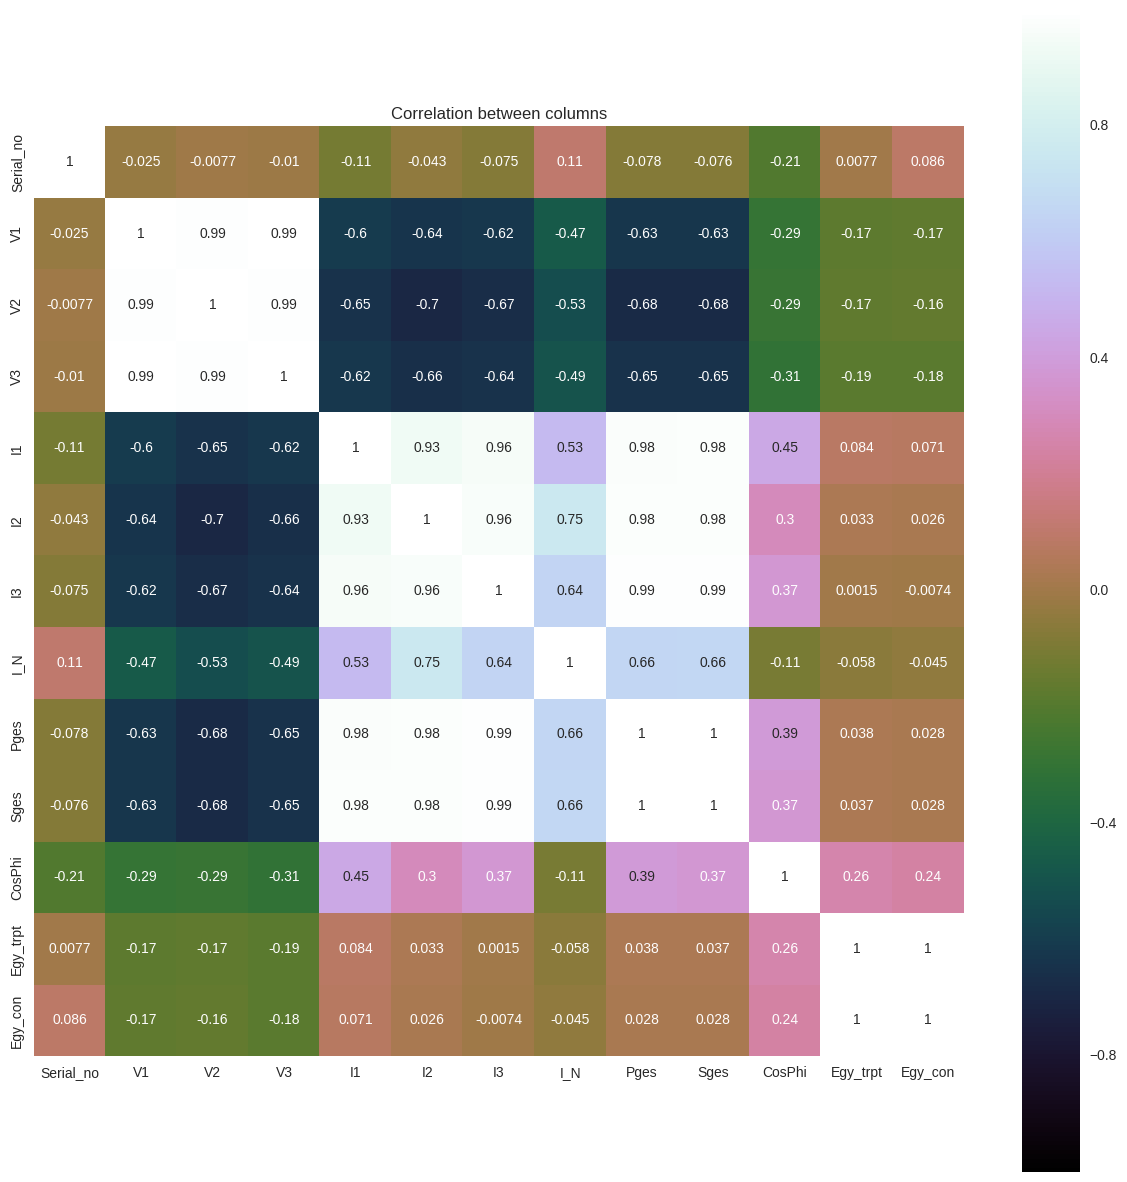

In [17]:
correlation = dfs.corr()
#plt.figure(figsize=(13,13))
fig = plt.figure(figsize=(15,15)) 
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between columns')

fig.savefig('Correlation_part1 Torschlag_Trafo_1077541_1630988.png')

# Statistics calculation implementation

# Plot statistics by grouping location 

In [18]:
dfs_loc = dfs.groupby('Location') # groupby location wise
#df_loc_part1 = dfs_drop_part1.groupby('Location') # groupby location wise

# Describe() : Produces the basic statistics of the DataFrame

In [19]:
dfs.drop(labels=['Time','Serial_no'],axis=1).describe()

,V1,V2,V3,I1,I2,I3,I_N,Pges,Sges,CosPhi,Egy_trpt,Egy_con
count,553447.000000,553447.000000,553447.000000,553447.000000,553447.000000,553447.000000,553447.000000,553447.000000,553447.000000,553447.000000,553447.000000,553447.000000
mean,234.668567,234.201042,234.060903,24.257576,40.776492,35.705940,19.411601,22335.877270,23487.901645,0.908673,13256.332811,12081107.835723
std,1.861457,2.024956,1.944516,25.125302,32.286837,28.842422,10.028788,18700.990878,19632.582468,0.042346,9164.352155,6943357.552734
min,229.300000,228.320000,228.340000,1.960000,6.410000,4.830000,4.300000,3017.990000,5411.580000,0.610000,624.000000,2434476.000000
25%,233.200000,232.590000,232.520000,8.040000,17.820000,15.370000,12.300000,9540.270000,10045.680000,0.890000,1674.000000,3421009.920000
50%,234.750000,234.340000,234.150000,11.560000,26.020000,23.490000,16.500000,13423.160000,13955.520000,0.910000,20356.000000,16834805.760000
75%,236.240000,235.920000,235.720000,31.060000,56.330000,46.440000,23.930000,29698.690000,31139.330000,0.940000,20356.000000,17727018.240000
max,240.320000,239.610000,239.660000,158.090000,199.340000,177.620000,83.940000,116783.700000,123103.590000,1.020000,20393.000000,18357991.680000


# Saving the basic statistics to csv

In [20]:
dfs.drop(labels=['Time','Serial_no'],axis=1).describe().to_csv(r'Torschlag_Trafo_1077541_1630988_describe.csv',sep=',')

In [26]:
#dfs.iloc[0:500000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_1.csv',sep=',')

In [27]:
#dfs.iloc[500000:1000000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_2.csv',sep=',')

In [28]:
#dfs.iloc[1000000:1500000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_3.csv',sep=',')

In [29]:
#dfs.iloc[1500000:2000000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_4.csv',sep=',')

In [30]:
#dfs.iloc[2000000:2500000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_5.csv',sep=',')

In [31]:
#dfs.iloc[2500000:3000000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_6.csv',sep=',')

In [32]:
#dfs.iloc[3000000:3500000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_7.csv',sep=',')

In [33]:
#dfs.iloc[3500000:4000000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_8.csv',sep=',')

In [34]:
#dfs.iloc[4000000:4500000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_9.csv',sep=',')

In [35]:
#dfs.iloc[4500000:-1][:].describe().to_csv(r'Torschlag_Trafo_corr_last.csv',sep=',')

# Below you will calculate the correlation on the data grouped by location

In [36]:
#dfs_grp_loc = dfs.iloc[0:500000][:]

In [37]:
#dfs_grp_loc.groupby('Location').describe()

In [22]:
dfs_loc.corr(method='pearson', min_periods=1)

CosPhi   Egy_con  Egy_trpt  \
Location                                                               
Torschlag_Trafo_06012016.csv CosPhi     1.000000 -0.294338       NaN   
                             Egy_con   -0.294338  1.000000       NaN   
                             Egy_trpt        NaN       NaN       NaN   
                             I1         0.383259  0.027906       NaN   
                             I2         0.265752  0.033862       NaN   
                             I3         0.301682  0.050547       NaN   
                             I_N        0.074918  0.181914       NaN   
                             Pges       0.323777  0.037090       NaN   
                             Serial_no -0.323251  0.981626       NaN   
                             Sges       0.315056  0.039907       NaN   
                             V1        -0.213051  0.012368       NaN   
                             V2        -0.197596 -0.017283       NaN   
                             V3        -0.226236  0.030490       NaN   
Torschlag_Trafo_06122015.csv CosPhi     1.000000 -0.067677 -0.104612   
                             Egy_con   -0.067677  1.000000  0.886053   
                             Egy_trpt  -0.104612  0.886053  1.000000   
                             I1         0.472157 -0.087419 -0.011173   
                             I2         0.068517  0.094672  0.039709   
                             I3         0.190320 -0.342122 -0.344651   
                             I_N       -0.497260 -0.156901 -0.238746   
                             Pges       0.426337 -0.155176 -0.171997   
                             Serial_no -0.061031  0.999285  0.897602   
                             Sges       0.305248 -0.147231 -0.150952   
                             V1        -0.107558 -0.132947 -0.039726   
                             V2        -0.070637 -0.217325 -0.111886   
                             V3        -0.106198 -0.070382  0.044999   
Torschlag_Trafo_07012016.csv CosPhi     1.000000 -0.248394       NaN   
                             Egy_con   -0.248394  1.000000       NaN   
                             Egy_trpt        NaN       NaN       NaN   
                             I1         0.297009  0.027127       NaN   
...                                          ...       ...       ...   
Torschlag_Trafo_08012016.csv Sges       0.068877  0.016804       NaN   
                             V1        -0.189032  0.422937       NaN   
                             V2        -0.151669  0.397923       NaN   
                             V3        -0.173657  0.367777       NaN   
Torschlag_Trafo_08122015.csv CosPhi     1.000000 -0.304801       NaN   
                             Egy_con   -0.304801  1.000000       NaN   
                             Egy_trpt        NaN       NaN       NaN   
                             I1         0.584653 -0.019236       NaN   
                             I2         0.369393  0.092936       NaN   
                             I3         0.531350  0.052539       NaN   
                             I_N       -0.109192  0.259749       NaN   
                             Pges       0.507327  0.049655       NaN   
                             Serial_no -0.278849  0.979076       NaN   
                             Sges       0.495924  0.048150       NaN   
                             V1        -0.081198 -0.215821       NaN   
                             V2        -0.063628 -0.226956       NaN   
                             V3        -0.103813 -0.199785       NaN   
Torschlag_Trafo_09012016.csv CosPhi     1.000000  0.168334  0.143565   
                             Egy_con    0.168334  1.000000  0.857489   
                             Egy_trpt   0.143565  0.857489  1.000000   
                             I1         0.544349  0.269237  0.392377   
                             I2        -0.024528  0.238147  0.361248   
                             I3         0.265716  0.529219  0.512197   
          

# Plot voltage vs time

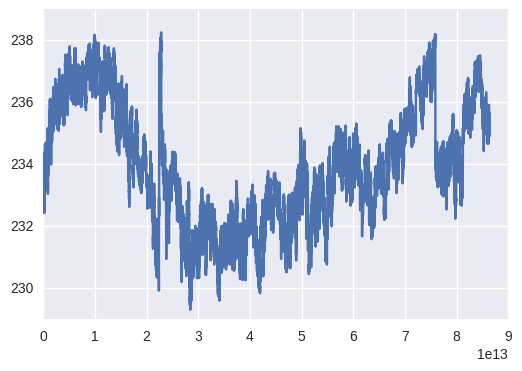

In [23]:
import datetime
import numpy as np

x = dfs['Time'].where (dfs['Location'] == 'Torschlag_Trafo_06012016.csv')
y = dfs['V1'].where (dfs['Location'] == 'Torschlag_Trafo_06012016.csv')

plt.plot(x,y)
plt.savefig('Voltage vs Time Torschlag_Trafo_06012016.png')
plt.show()

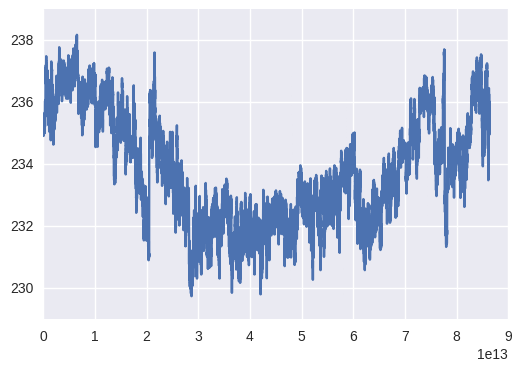

In [24]:
import numpy as np

x = dfs['Time'].where (dfs['Location'] == 'Torschlag_Trafo_07012016.csv')
y = dfs['V1'].where (dfs['Location'] == 'Torschlag_Trafo_07012016.csv')

plt.plot(x,y)
plt.savefig('Voltage vs Time Torschlag_Trafo_07012016.png')
plt.show()

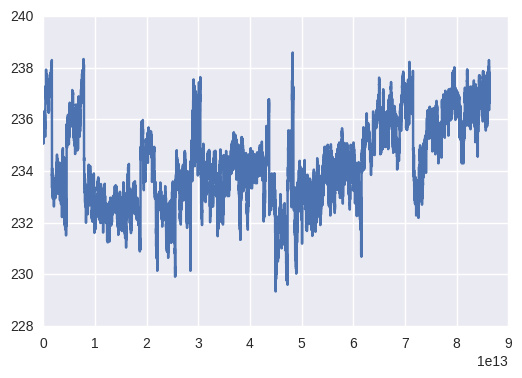

In [25]:
import datetime
import numpy as np

x = dfs['Time'].where (dfs['Location'] == 'Torschlag_Trafo_08012016.csv')
y = dfs['V1'].where (dfs['Location'] == 'Torschlag_Trafo_08012016.csv')

plt.plot(x,y)
plt.savefig('Voltage vs Time Torschlag_Trafo_08012016.png')
plt.show()

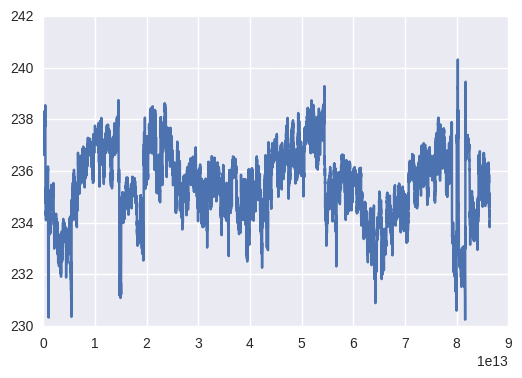

In [26]:
import datetime
import numpy as np

x = dfs['Time'].where (dfs['Location'] == 'Torschlag_Trafo_09012016.csv')
y = dfs['V1'].where (dfs['Location'] == 'Torschlag_Trafo_09012016.csv')

plt.plot(x,y)
plt.savefig('Voltage vs Time Torschlag_Trafo_09012016.png')
plt.show()

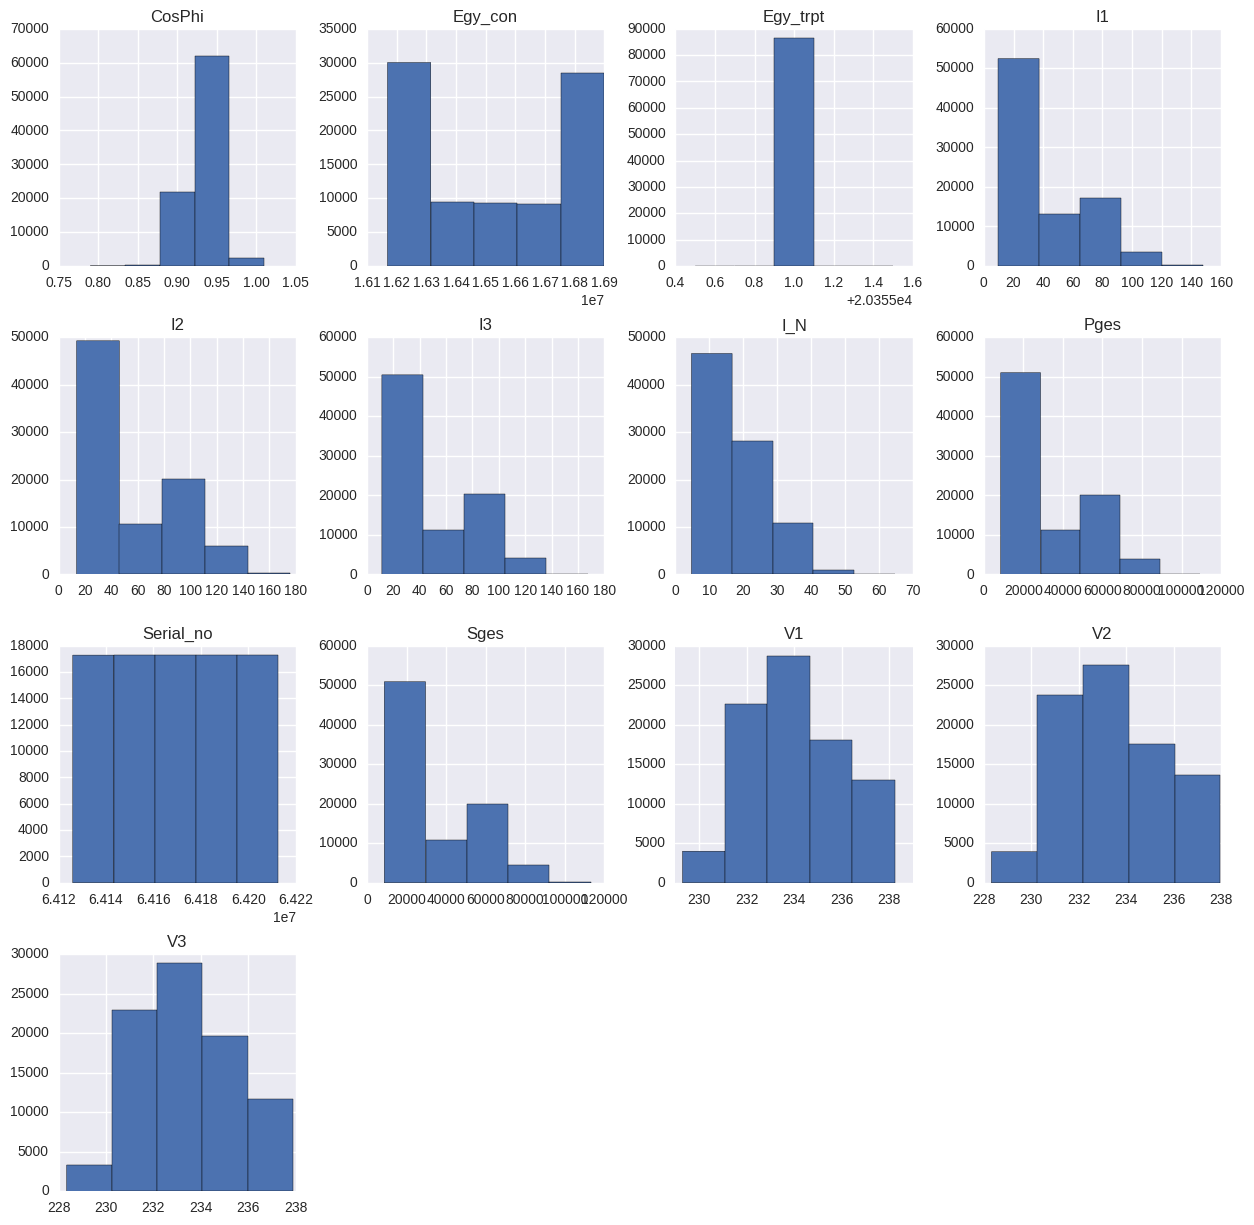

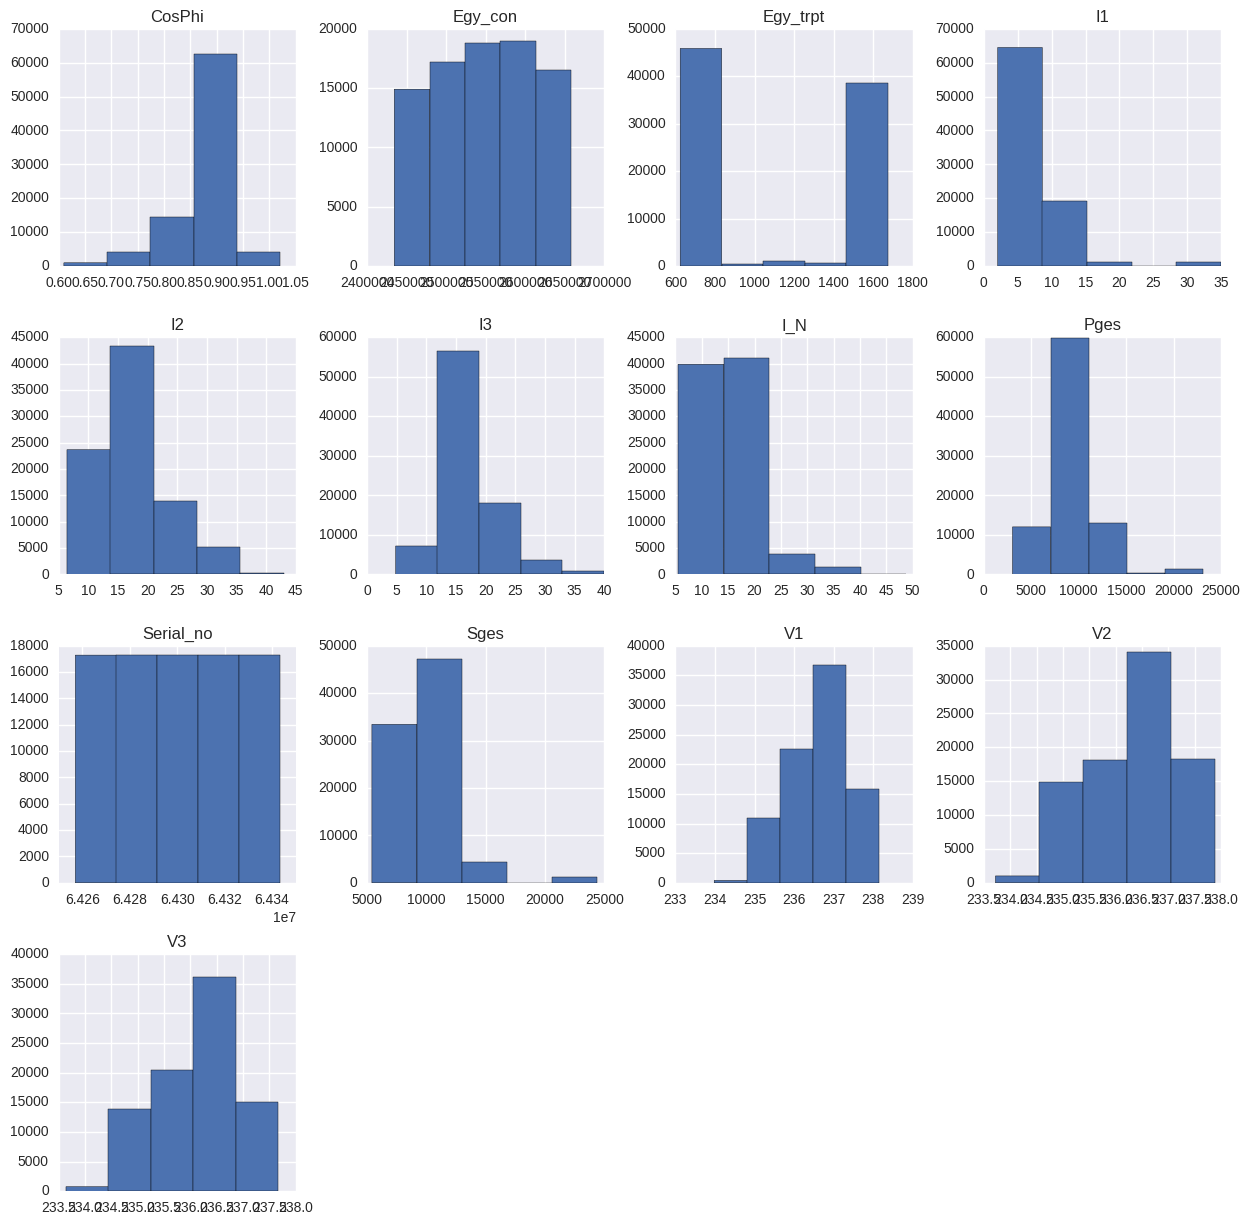

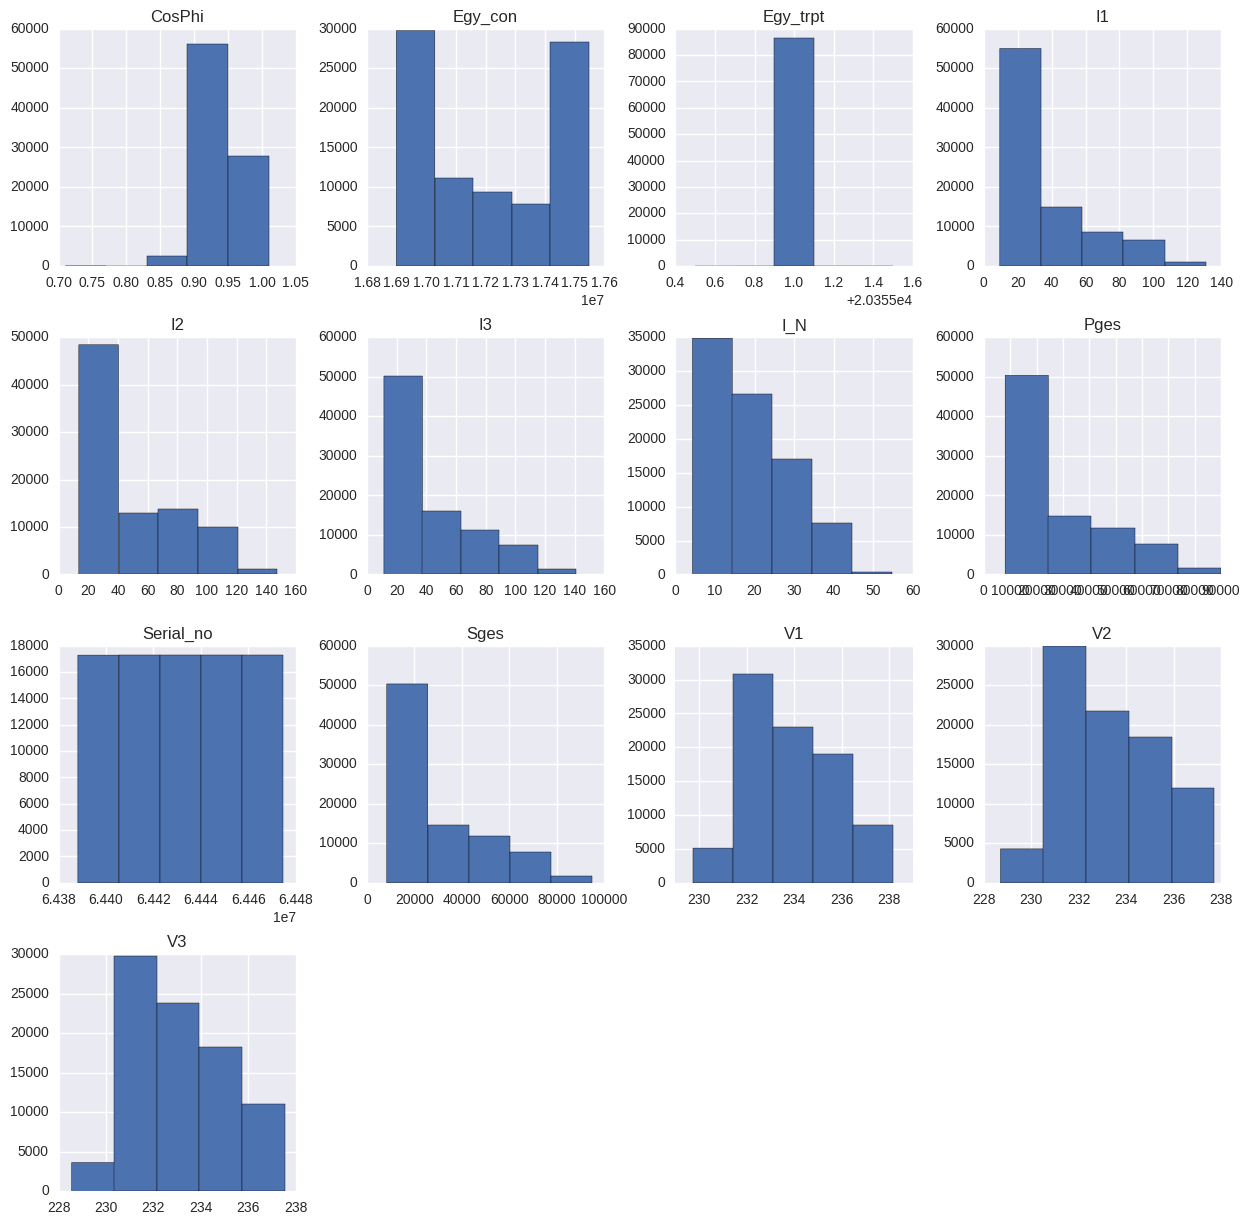

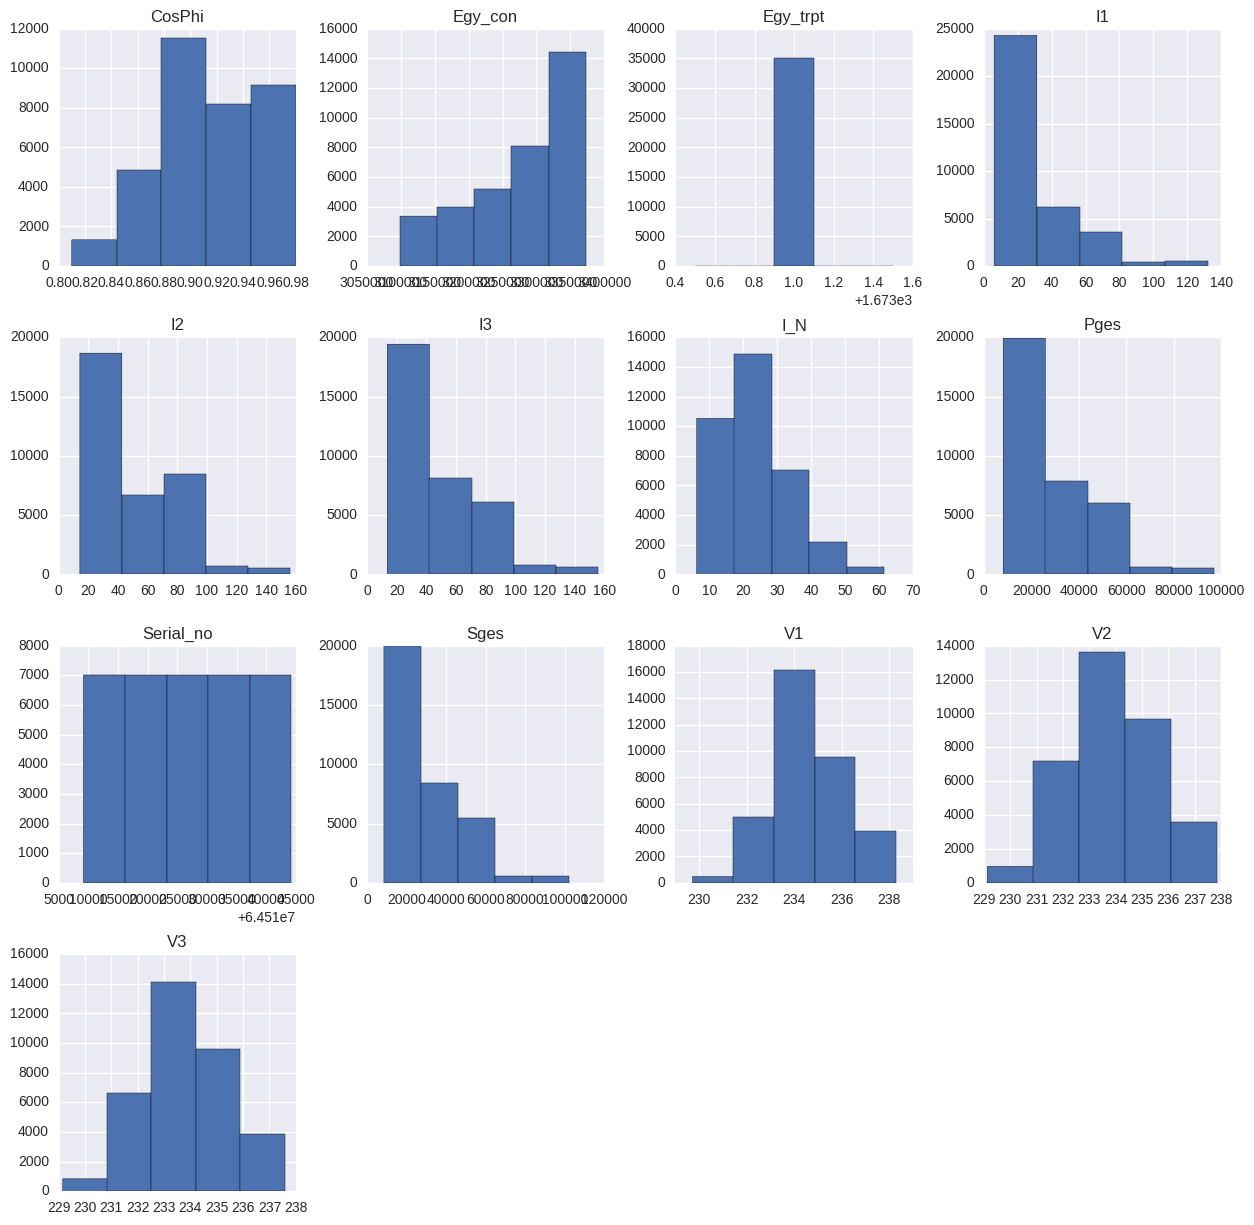

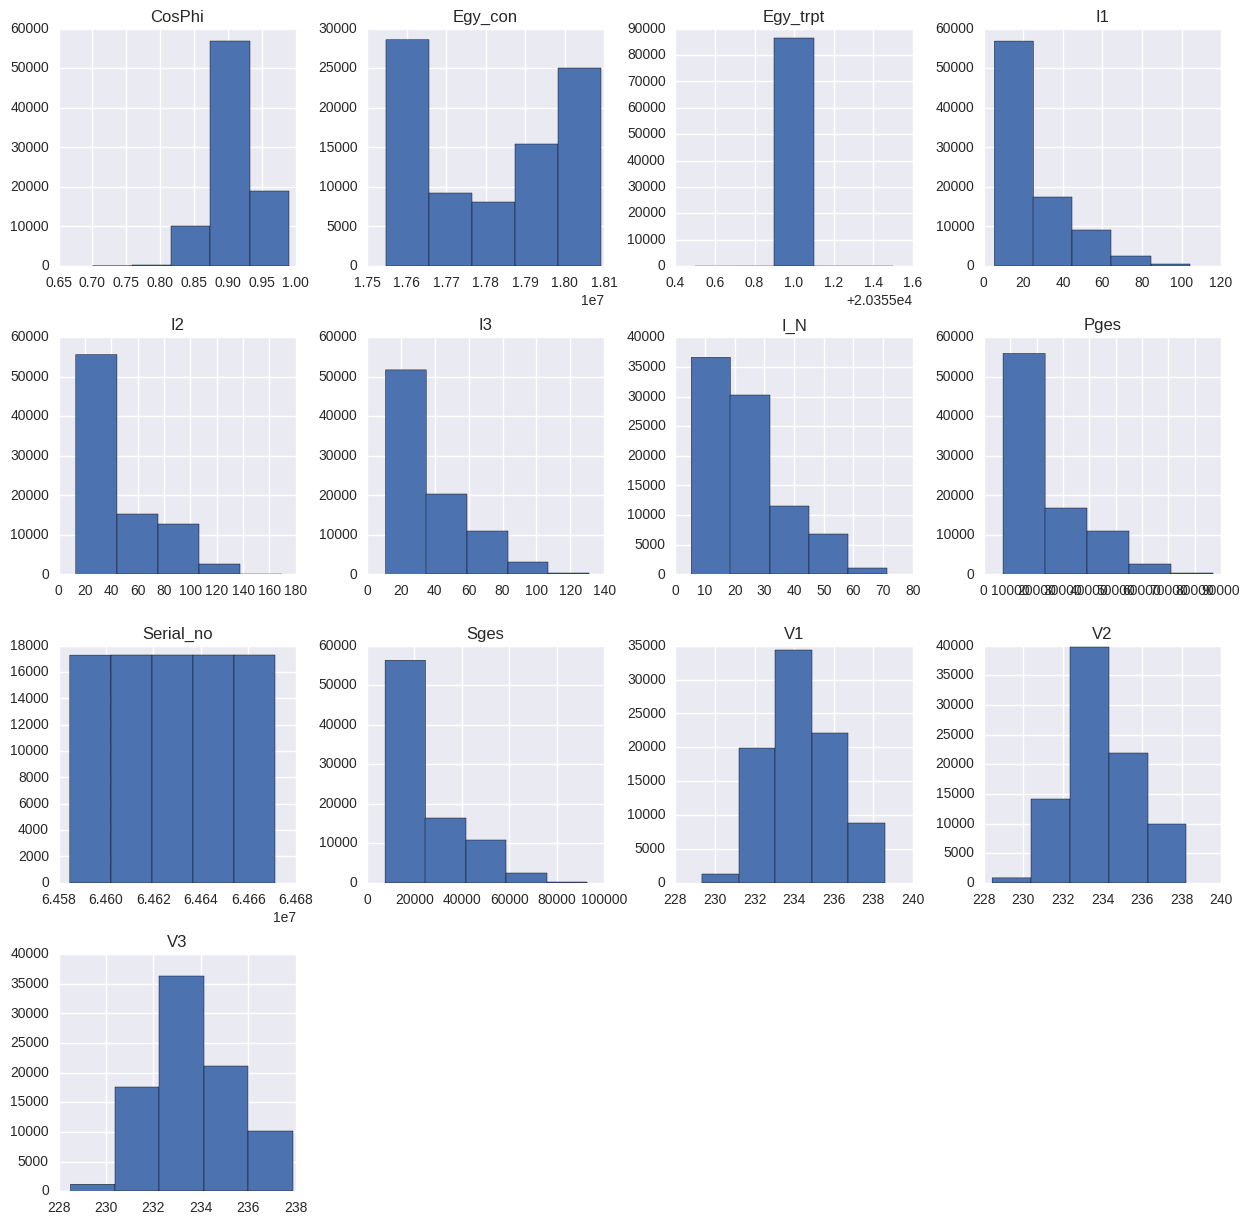

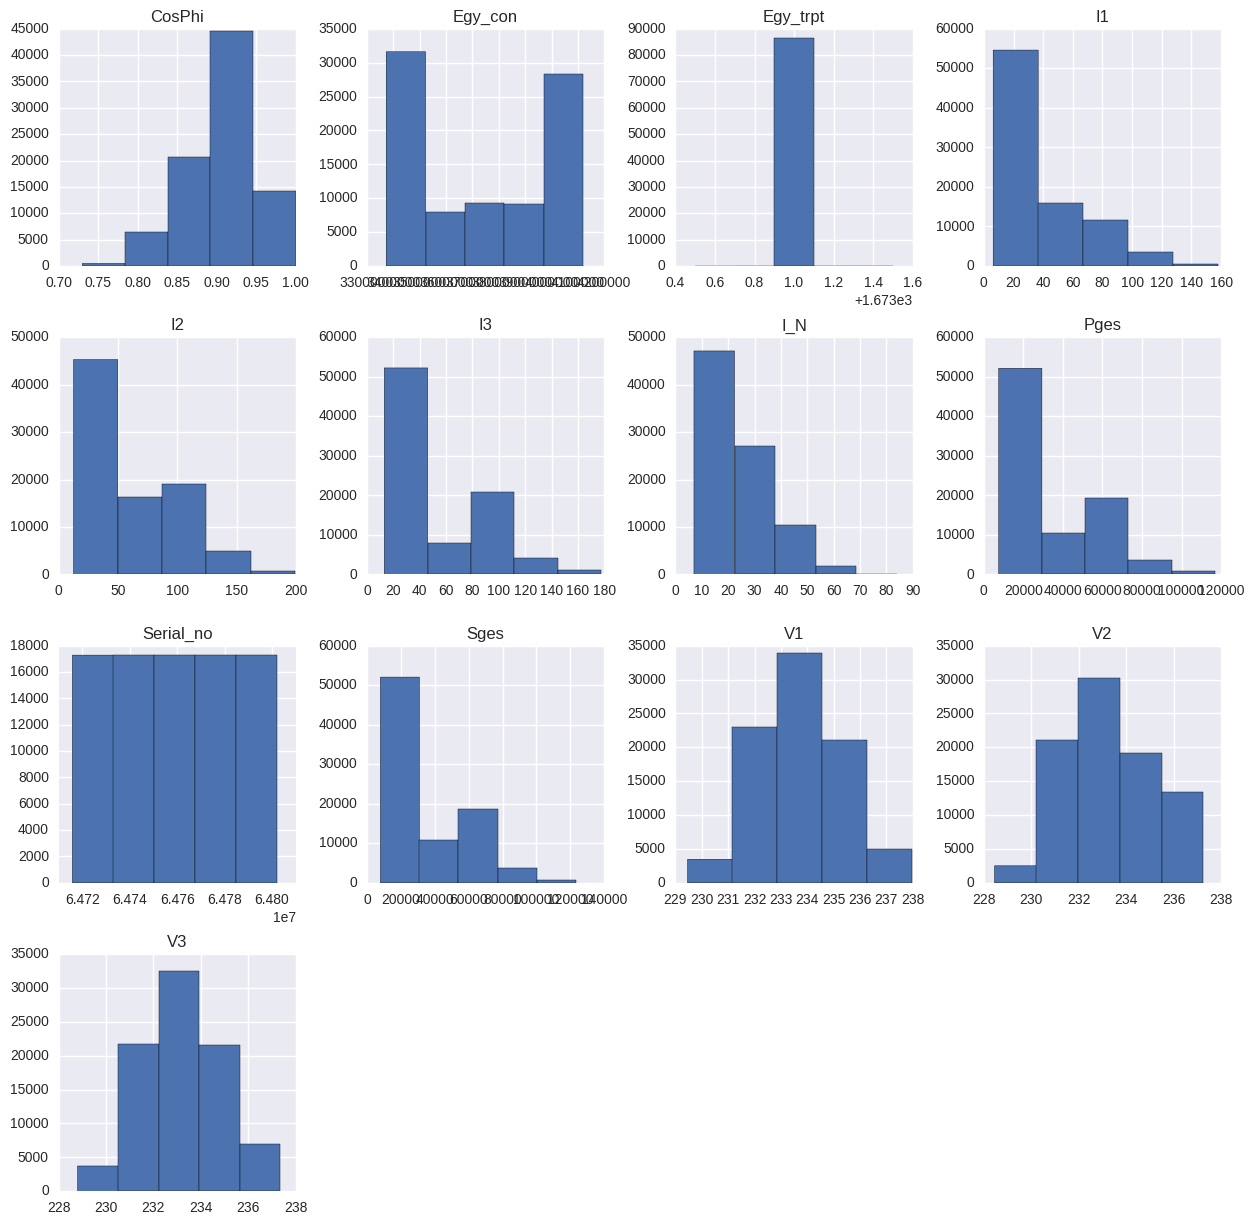

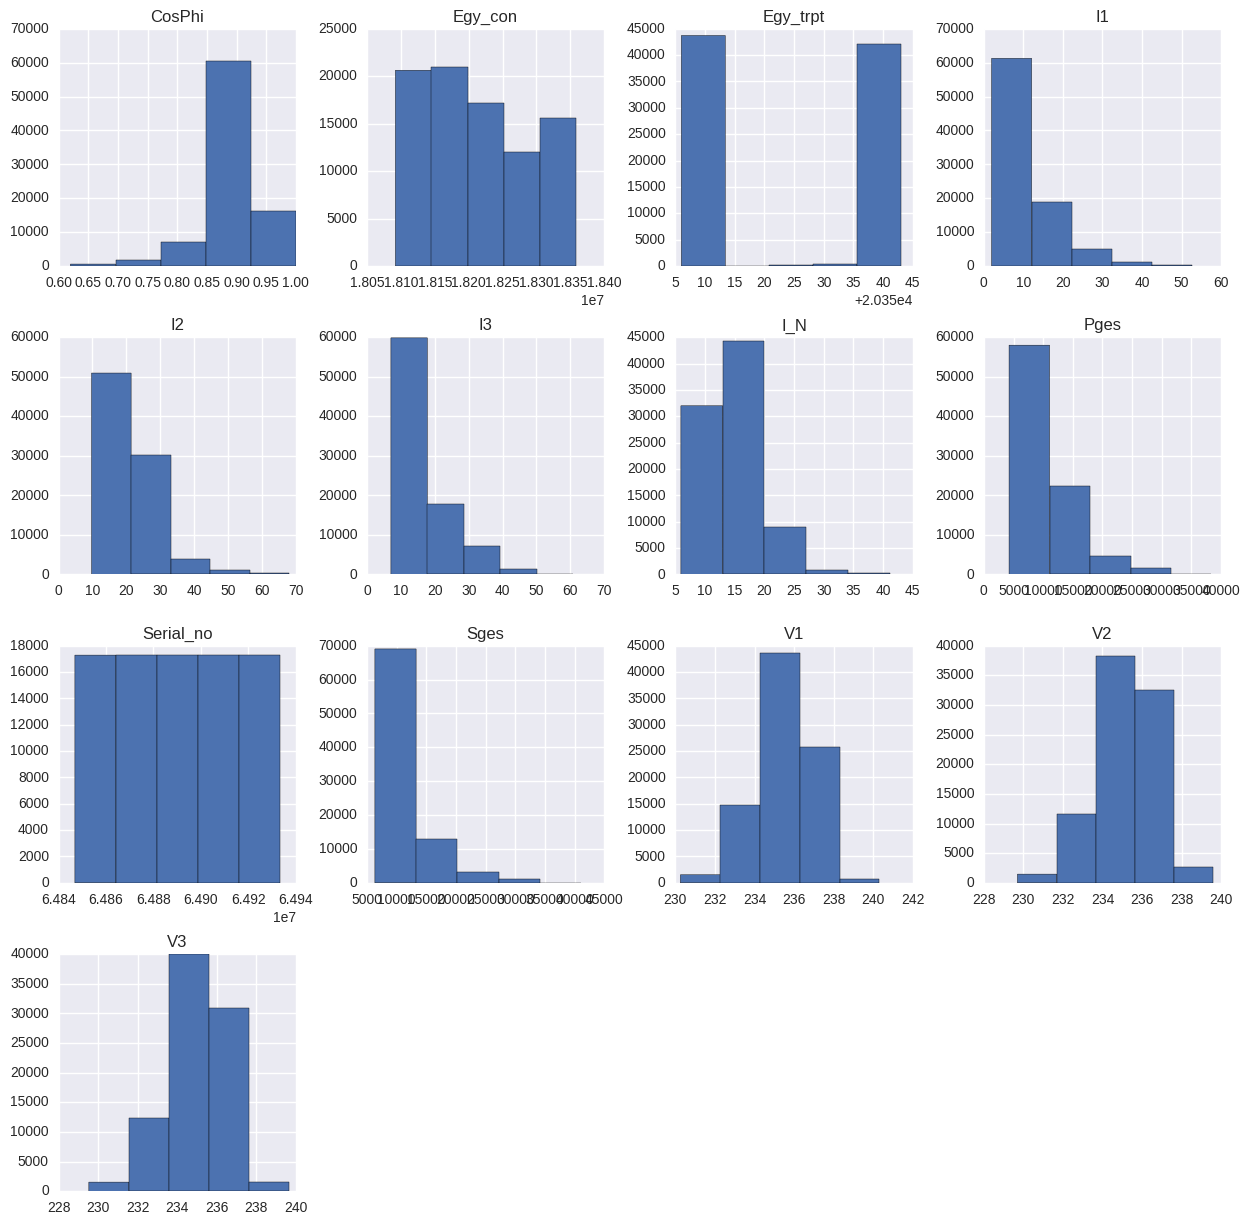

In [27]:
dfs_loc.hist(bins=5,figsize=(15,15))
plt.savefig('Torschlag_Trafo_groupby_location_pearson_corr_1077541_1630988.png')
    

# Compute only the mean of the data grouped by location and visualize

In [28]:
df_st_mean = dfs_loc.mean()
df_st_mean

,Serial_no,V1,V2,V3,I1,I2,I3,I_N,Pges,Sges,CosPhi,Egy_trpt,Egy_con
Location,,,,,,,,,,,,,
Torschlag_Trafo_06012016.csv,64169186,234.013099,233.409462,233.370169,36.615334,52.995306,47.074600,17.618665,30420.591882,31778.917566,0.936766,20356.000000,16526890.457616
Torschlag_Trafo_06122015.csv,64300255,236.611273,236.326539,236.130523,8.220028,17.343610,16.646569,15.171597,9285.848466,9970.191876,0.877529,1120.338426,2548887.496795
Torschlag_Trafo_07012016.csv,64431325,233.853084,233.290980,233.107145,32.569792,47.484058,42.151922,19.081699,27047.192345,28400.490530,0.931747,20356.000000,17214398.802132
Torschlag_Trafo_07122015.csv,64536719,234.510681,233.848397,233.782098,27.549419,50.675644,47.096207,23.748866,28159.928366,29245.889355,0.913261,1674.000000,3279093.912513
Torschlag_Trafo_08012016.csv,64627930,234.341404,233.918258,233.661069,23.123219,43.327408,36.104509,24.216087,22664.735098,23955.179647,0.910441,20356.000000,17817404.482665
Torschlag_Trafo_08122015.csv,64759000,233.741271,233.207834,233.178832,32.759615,57.574941,50.517697,23.797229,31146.773802,32740.262888,0.904078,1674.000000,3735891.778226
Torschlag_Trafo_09012016.csv,64890070,235.515308,235.196222,235.030769,10.922284,21.918200,17.120031,14.824906,11087.700060,11746.746271,0.889616,20374.092465,18213746.100635


In [29]:
df_st_mean.to_csv(r'Torschlag_trafo_mean_groupby_location_1077541_1630988.csv',sep=',')

# Plot the groupby location 

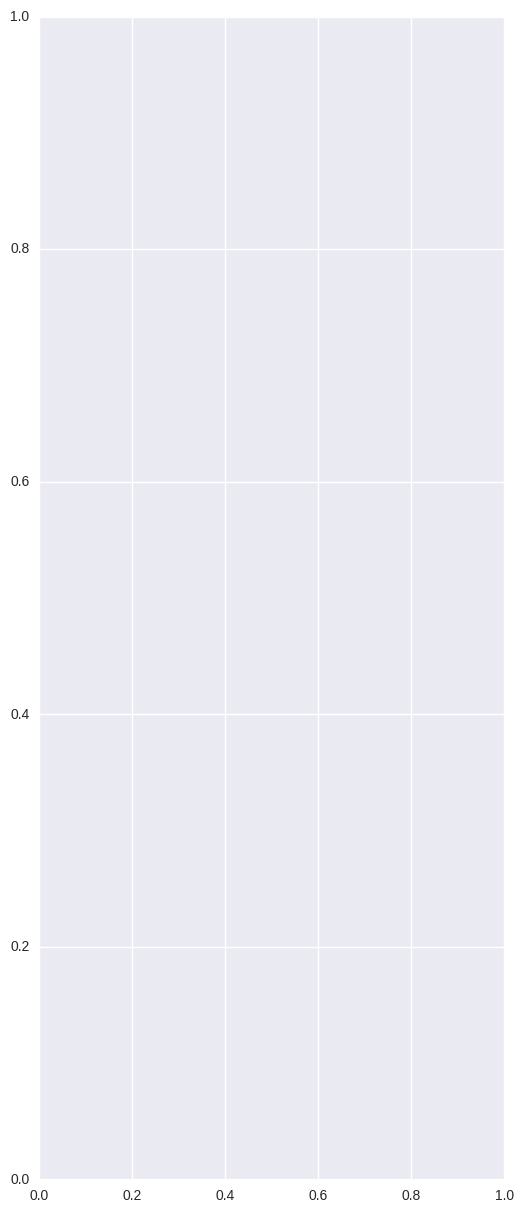

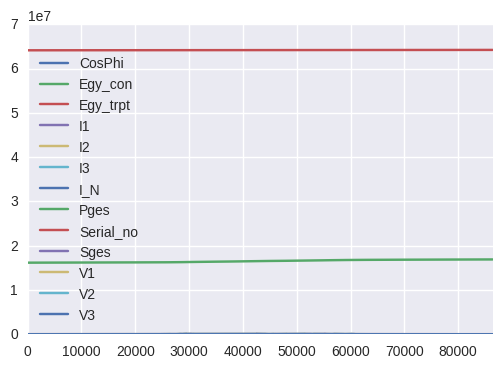

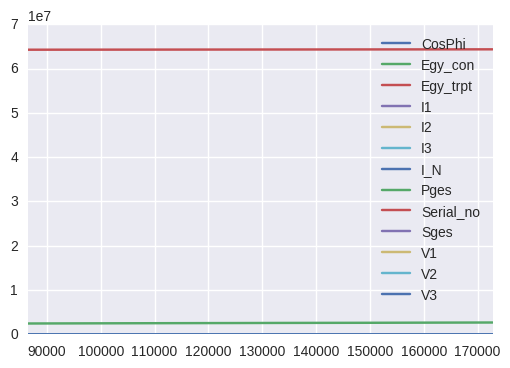

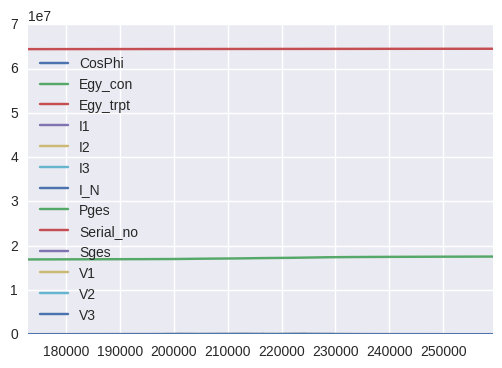

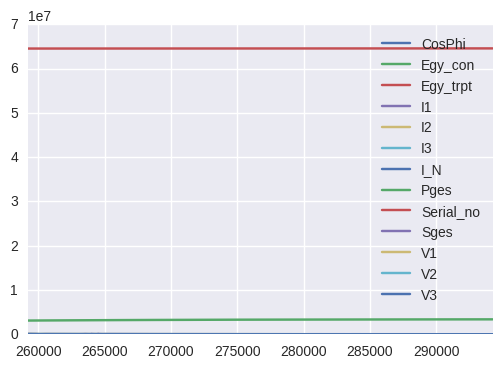

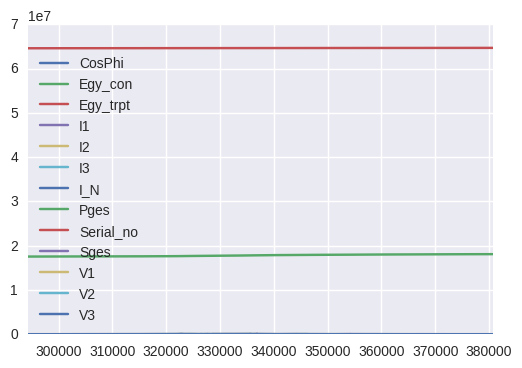

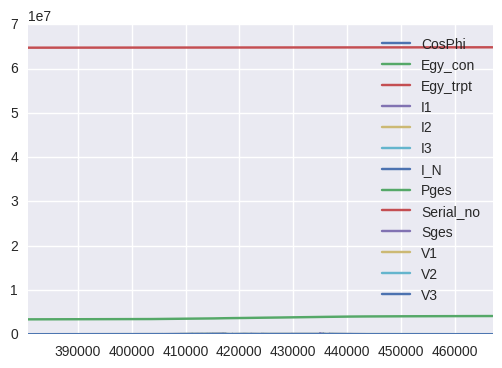

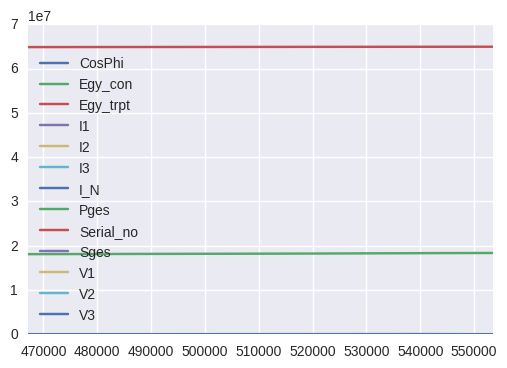

In [30]:
fig1,ax2 = plt.subplots(figsize=(6,15))
bp = dfs_loc.plot(kind='kde', ax2 = ax2, legend=False)


# PCA implementation

In [31]:
dfs_drop = dfs.drop(labels=['Serial_no', 'Date', 'Time','Location'],axis=1)

In [32]:
dfs_drop.columns

Index([u'V1', u'V2', u'V3', u'I1', u'I2', u'I3', u'I_N', u'Pges', u'Sges',
       u'CosPhi', u'Egy_trpt', u'Egy_con'],
      dtype='object')

In [33]:
X = dfs_drop.iloc[:,0:6].values
X

array([[ 233.91,  233.42,  233.28,   12.12,   26.18,   25.27],
       [ 233.91,  233.42,  233.28,   12.12,   26.18,   25.27],
       [ 233.91,  233.42,  233.28,   12.12,   26.18,   25.27],
       ..., 
       [ 234.08,  233.63,  233.35,    5.73,   15.77,   13.14],
       [ 234.08,  233.63,  233.35,    5.73,   15.77,   13.14],
       [ 234.08,  233.63,  233.35,    5.73,   15.77,   13.14]])

In [34]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [35]:
from sklearn.decomposition import PCA 
sklearn_pca = PCA(n_components=6)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [36]:
Y_sklearn.shape

(553447, 6)

In [37]:
n_components = pd.DataFrame(Y_sklearn, columns=('V1', 'V2', 'V3', 'I1', 'I2', 'I3'))
n_components.head()

,V1,V2,V3,I1,I2,I3
0,-0.031152,-1.016627,-0.003584,0.092099,-0.02225,-0.035974
1,-0.031152,-1.016627,-0.003584,0.092099,-0.02225,-0.035974
2,-0.031152,-1.016627,-0.003584,0.092099,-0.02225,-0.035974
3,-0.031152,-1.016627,-0.003584,0.092099,-0.02225,-0.035974
4,-0.078339,-0.950202,0.022563,0.072042,-0.06727,-0.036429


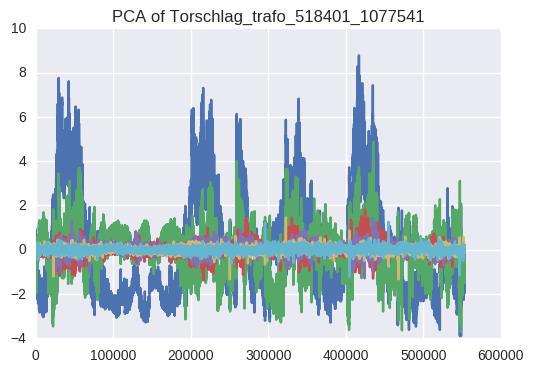

In [38]:
fig = plt.figure() 
plt.legend(loc='upper right')
plt.plot(n_components)
plt.title("PCA of Torschlag_trafo_518401_1077541")

fig.savefig('PCA of Torschlag_Trafo_1077541_1630988.png')


# Plot V1 and I1 vs Time of all locations extracted from SQL.

In [21]:
#dfs.iloc[500000:1000000][:].groupby('Location').describe()
dfs['Location'].unique()

array(['Torschlag_Trafo_06012016.csv', 'Torschlag_Trafo_06122015.csv',
       'Torschlag_Trafo_07012016.csv', 'Torschlag_Trafo_07122015.csv',
       'Torschlag_Trafo_08012016.csv', 'Torschlag_Trafo_08122015.csv',
       'Torschlag_Trafo_09012016.csv'], dtype=object)

In [45]:
def plotfunc(ax, a, b):
    return ax.plot(a, b)

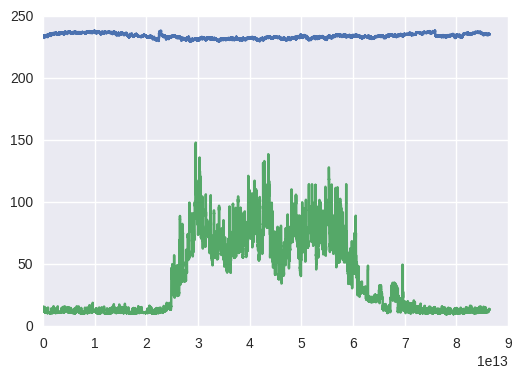

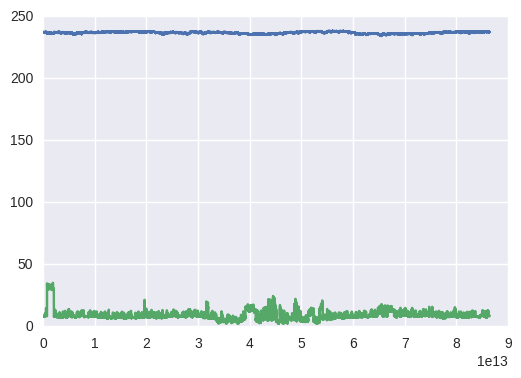

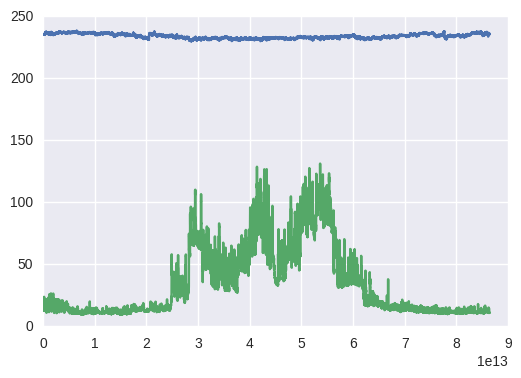

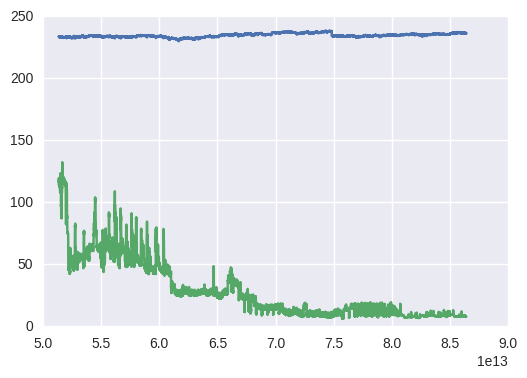

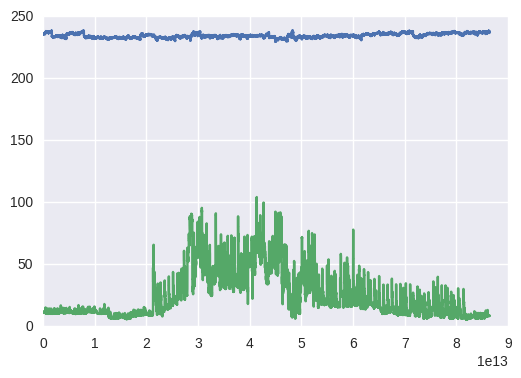

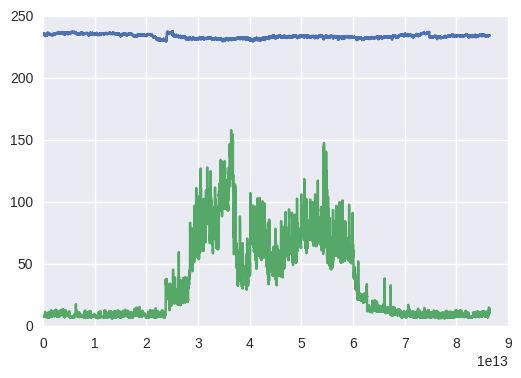

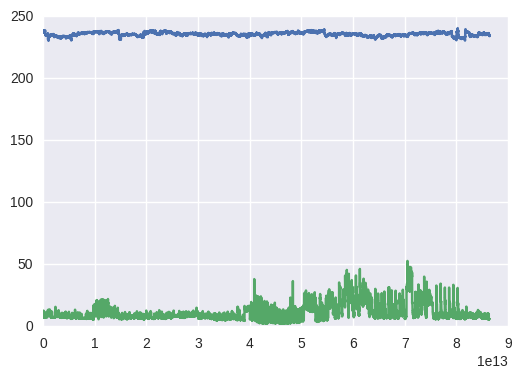

In [48]:
for loc in iter(dfs['Location'].unique()):
    fig, ax = plt.subplots(1,1)
    b = dfs['V1'].where (dfs['Location'] == loc)
    b1 = dfs['I1'].where (dfs['Location'] == loc)
    a = dfs['Time'].where (dfs['Location'] == loc)
    l1 = plotfunc(ax, a, b)
    l2 = plotfunc(ax, a, b1)
    plt.savefig('V1_I1_Time of %s.png' % loc)
    plt.show()